In [10]:
import numpy as np, json
import matplotlib.pyplot as plt
import os
import datetime as dt
from numpy.random import default_rng
import numpy as np
import pandas as pd
import json
from typing import Dict, Any, Tuple
from sklearn.decomposition import PCA
from scipy import stats
from arch import arch_model
from scipy.stats import norm, multivariate_normal


plt.style.use("seaborn-v0_8-whitegrid")
px_common = pd.read_csv("E:/data/stock_prices.csv", index_col="date", parse_dates=True)

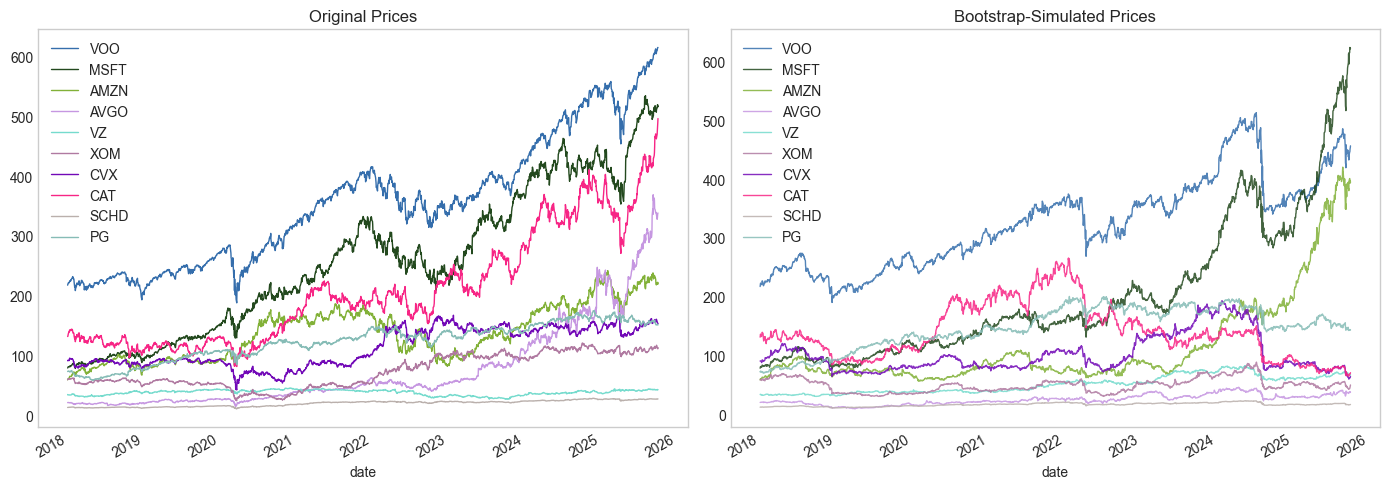

In [ ]:
def simulate_bootstrap_prices(px_common: pd.DataFrame, n_paths=20, seed=42, block_size=10) -> pd.DataFrame:

    rng = np.random.default_rng(seed)
    rets = np.log(px_common).diff().dropna().values
    T, N = rets.shape
    base = px_common.iloc[0].values

    prices = []
    for m in range(n_paths):
        idx_blocks = rng.integers(0, T - block_size, size=(T // block_size) + 1)
        R_sim = np.vstack([rets[i:i+block_size] for i in idx_blocks])

        R_sim = R_sim[:T, :]  # trim or pad to exactly T

        P = np.vstack([base, base * np.exp(np.cumsum(R_sim, axis=0))])
        idx = px_common.index[:P.shape[0]]  

        df = pd.DataFrame(P, columns=px_common.columns, index=idx)
        df["path_id"] = m
        prices.append(df)

    return pd.concat(prices, axis=0)

P_syn_boot = simulate_bootstrap_prices(px_common, n_paths=10, block_size=15, seed=123)

colors = [
    "#356EAC",  
    "#23491E", 
    "#82B138",  
    "#c697e1",  
    "#75dbcd",  
    "#B07AA1",  
    "#7209B7",  
    "#F72585",  
    "#BAB0AC",  
    "#86BCB6"]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
px_common.plot(ax=axes[0],lw=1.0,color=colors)
axes[0].set_title("Original Prices")
axes[0].grid(False)

P_syn_boot.query("path_id==0") .drop(columns="path_id", errors="ignore").plot(
        ax=axes[1],lw=1.0,alpha=0.85,color=colors)
axes[1].set_title("Bootstrap-Simulated Prices")
axes[1].grid(False)

plt.tight_layout()
plt.show()